In [28]:
import pandas as pd
import json
import os
import ast
import matplotlib.pyplot as plt

In [29]:
with open("../../../data/train_test_split/test_folders.json", "r") as train_file:
    test_folders = json.load(train_file)

In [30]:
df = pd.read_csv('../../../data/base_models/llama1b/temp0.5.eval.csv')
lisa_sheets = pd.read_csv('../../../data/lisa_sheets.csv')
df = pd.merge(df, lisa_sheets[['id', 'folder']], how='left', on='id')
df = df[df['folder'].isin(test_folders)]
df.head()

,id,question,option_a,option_b,option_c,option_d,correct_option,content_gpt,originality,readability,starts_with_negation,is_question,relevance,ambiguity,gpt_answer,disclosure,difficulty,folder
0,OIC-328-06-B,What is the main indication for using an ortho...,Trauma,Perforating injury,Neuroarthropathy,Rheumatoid pathology,a,**Item_parent:** Non-drug therapies and medica...,1.0,9.785556,False,True,0.710484,0.556452,a,False,5,IC-328
1,OIC-328-12-B,What is the main difference between a thermal ...,A thermal agent is an external water source (e...,A thermal agent is used for respiratory ailmen...,Both thermal and non-thermal agents are admini...,The main difference between a thermal agent an...,c,**Item_parent:** Non-drug therapies and medica...,1.0,9.825000,False,True,0.760340,0.742916,a,True,3,IC-328
2,OIC-328-05-A,What is the primary objective of orthotic trea...,Substitution,Correction,Downtime,Stabilization,a,**Item Parent:** Non-drug therapies and medica...,0.5,11.130000,False,True,0.697899,0.567827,d,False,2,IC-328
3,OIC-328-08-A,What is a key component of a femoral prosthesis?,Articular sleeve,Non-articular sleeve,Residual limb socket,Upper limb end effector,option_a,**Item Parent:** Non-drug therapies and medica...,1.0,7.586667,False,True,0.719052,0.000000,c,False,5,IC-328
4,OIC-328-02-A,What is the main purpose of a device classifie...,To treat a specific medical condition,To provide general information to patients,To improve patient outcomes through non-medica...,To increase profits for manufacturers,c,**Item Parent:** Non-drug therapies and medica...,1.0,8.009091,False,True,0.687329,0.662431,c,True,4,IC-328


In [31]:
len(df)

1524

In [32]:
df['correct_option'].unique()

array(['a', 'c', 'option_a', 'b', 'option_c', 'option_b', 'd', 'A',
       'A type of bacterial infection that occurs in hospitals',
       'A distinction must be made between personal misconduct or misconduct detached from the service, which gives rise to personal civil liability on the part of the perpetrator.',
       'A violation of professional ethics',
       'Lowering of the testicle via an inguinal approach',
       'A painful enlargement of the bursae is due to torsion',
       'option_d', 'to increase physical activity', 'B', '10/10th',
       'to prevent congenital heart malformations',
       'To remove contaminants from treated water',
       'to ensure quality control before publication',
       'to identify a specific problem or phenomenon',
       'to facilitate communication between healthcare providers and patients',
       'A single chancre with minimal inflammation',
       'A clinical examination of both members of the couple',
       ' option_a', 'To quit smoking'

In [33]:
# normalize correct_option
df['correct_option'] = df['correct_option'].replace({'option_b': 'b', 'option_c': 'c', 'option_d': 'd', 'option_a': 'a'}) 

# Question mark

In [34]:
# We want to maximize 'True'
question_freqs = {
    'True': round(df['is_question'].sum()/ len(df) * 100, 2),
    'False': round((len(df) - df['is_question'].sum()) / len(df) * 100, 2)
}

question_freqs

{'True': np.float64(99.8), 'False': np.float64(0.2)}

# Negation

In [35]:
# We want to minimze 'True'
starts_with_negation_freqs = {
    'True': round(df['starts_with_negation'].sum() / len(df) * 100, 2),
    'False': round((len(df) - df['starts_with_negation'].sum()) / len(df) * 100, 2)
}

starts_with_negation_freqs

{'True': np.float64(0.0), 'False': np.float64(100.0)}

# Readability

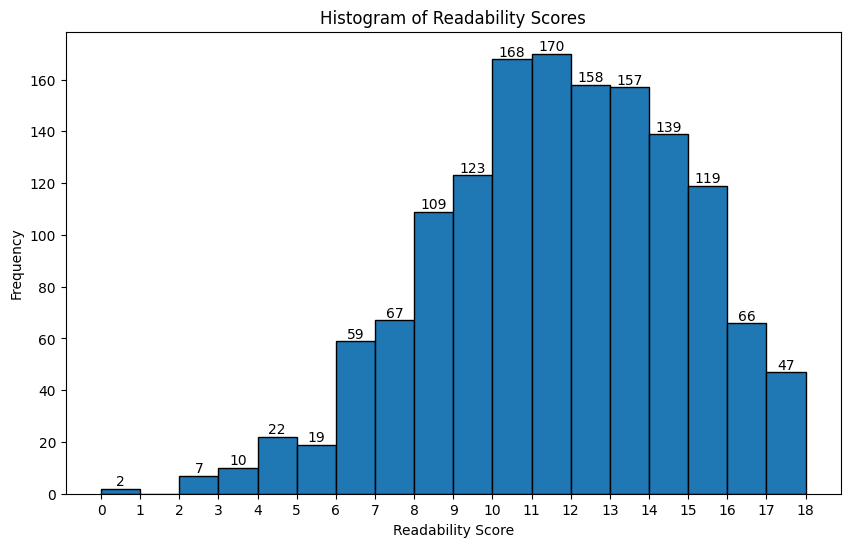

In [36]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['readability'], bins=range(0, 19, 1), edgecolor='black')

# Set x-axis ticks from 0 to 18
plt.xticks(range(0, 19))

# Add frequency labels on top of each bar where frequency > 0
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores')
plt.show()

In [37]:
df['readability'].describe()

count    1516.000000
mean       12.048764
std         3.574800
min         0.520000
25%         9.655000
50%        12.037500
75%        14.270000
max        23.584286
Name: readability, dtype: float64

# Originality

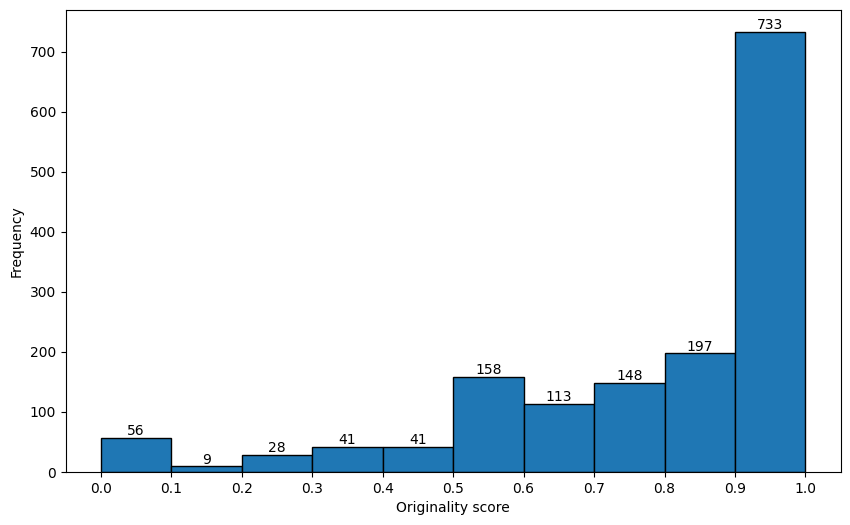

In [38]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['originality'], bins=10, range=(0, 1), edgecolor='black')

plt.xticks([round(x * 0.1, 1) for x in range(11)])

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

plt.xlabel('Originality score')
plt.ylabel('Frequency')
plt.show()

In [39]:
df['originality'].describe()

count    1524.000000
mean        0.790873
std         0.263872
min         0.000000
25%         0.666667
50%         0.857143
75%         1.000000
max         1.000000
Name: originality, dtype: float64

# Answer Length

In [40]:
option_cols = ['option_a', 'option_b', 'option_c', 'option_d']

# Create new columns with word counts for each option column
for col in option_cols:
    df[f'{col}_word_count'] = df[col].astype(str).apply(lambda x: len(x.split()))

In [41]:
df['correct_option'].unique()

array(['a', 'c', 'b', 'd', 'A',
       'A type of bacterial infection that occurs in hospitals',
       'A distinction must be made between personal misconduct or misconduct detached from the service, which gives rise to personal civil liability on the part of the perpetrator.',
       'A violation of professional ethics',
       'Lowering of the testicle via an inguinal approach',
       'A painful enlargement of the bursae is due to torsion',
       'to increase physical activity', 'B', '10/10th',
       'to prevent congenital heart malformations',
       'To remove contaminants from treated water',
       'to ensure quality control before publication',
       'to identify a specific problem or phenomenon',
       'to facilitate communication between healthcare providers and patients',
       'A single chancre with minimal inflammation',
       'A clinical examination of both members of the couple',
       ' option_a', 'To quit smoking', 'Myocarditis', 'C',
       'To monitor and pre

In [42]:
def get_correct_option_rank(row):
    # Get the original word counts for each option
    counts = [
        row['option_a_word_count'],
        row['option_b_word_count'],
        row['option_c_word_count'],
        row['option_d_word_count']
    ]

    # Map correct_option letter to its index (0 for A, 1 for B, etc.)
    letter_to_index = {'A': 0, 'a':0, 'B': 1, 'b':1, 'C': 2, 'c':2, 'D': 3, 'd':3}
    correct_idx = letter_to_index[row['correct_option']]

    # Determine the word count of the correct option
    correct_count = counts[correct_idx]

    # Create an effective counts list:
    # For non-correct options, if their word count equals the correct option's word count,
    # treat them as if they had one extra word.
    effective_counts = []
    for i, count in enumerate(counts):
        if i != correct_idx and count == correct_count:
            effective_counts.append(count + 1)
        else:
            effective_counts.append(count)

    # Sort the option indices by descending effective count.
    ordering = sorted(range(4), key=lambda i: effective_counts[i], reverse=True)

    # Compute the rank as the 1-indexed position of the correct option in the ordering.
    rank = ordering.index(correct_idx) + 1
    return rank

In [43]:
def get_rank_distribution(df):
  rank_distribution = df['correct_option_rank'].value_counts().sort_index()
  rank_distribution = round(rank_distribution / len(df), 2) * 100

  plt.figure(figsize=(8, 6))
  plt.bar(rank_distribution.index, rank_distribution.values, color='skyblue', edgecolor='black')
  plt.xlabel('N (1 = Longest, 4 = Shortest)')
  plt.ylabel('Frequency, %')
  plt.title('How often the correct option is N`th longest')
  plt.xticks([1, 2, 3, 4])
  plt.show()

In [44]:
# df['correct_option_rank'] = df.apply(get_correct_option_rank, axis=1)
# get_rank_distribution(df)

# Disclosure

In [45]:
disclosure_freqs = {
    'True': round((df['disclosure'].sum() / len(df)) * 100, 2),
    'False': round((len(df) - df['disclosure'].sum()) / len(df) * 100, 2)
}

disclosure_freqs

{'True': np.float64(10.5), 'False': np.float64(89.5)}

# Relevance to the input material

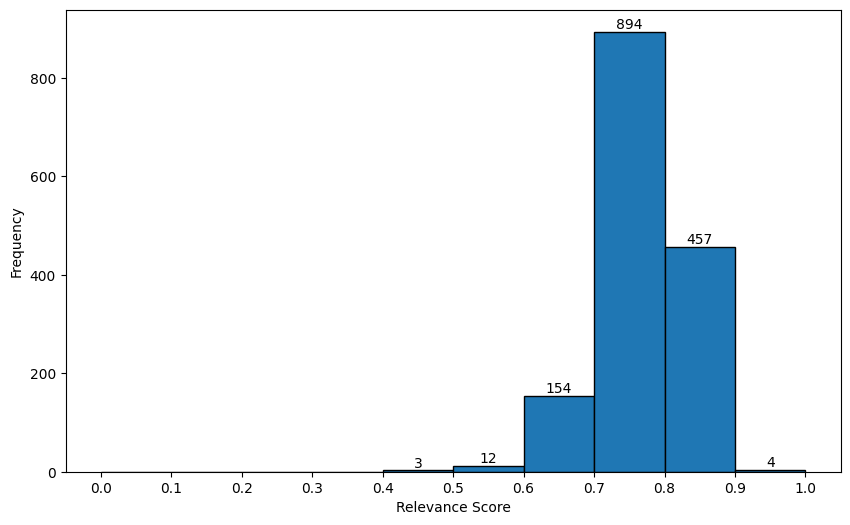

In [46]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['relevance'], bins=10, range=(0, 1), edgecolor='black')

plt.xticks([round(x * 0.1, 1) for x in range(11)])

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()

In [47]:
df['relevance'].describe()

count    1524.000000
mean        0.768016
std         0.057649
min         0.426711
25%         0.736445
50%         0.773851
75%         0.807365
max         0.921608
Name: relevance, dtype: float64

# Ambiguity (cosine similarity)

Text(0.5, 1.0, 'Distribution of Ambiguity')

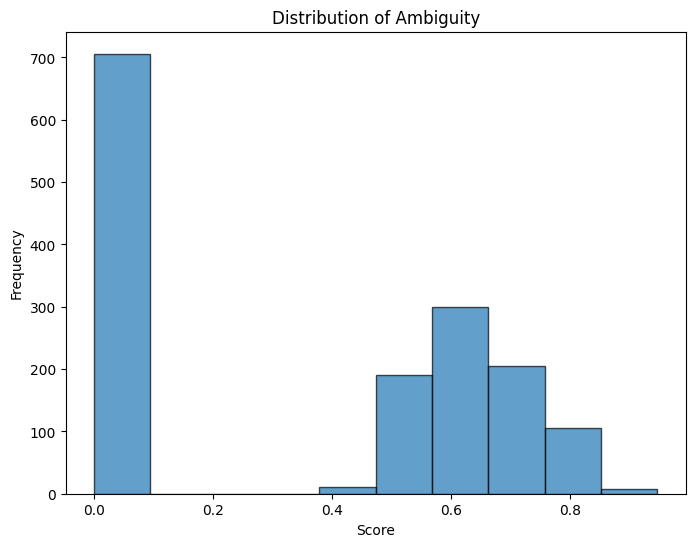

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(df['ambiguity'], bins=10, edgecolor='black', alpha=0.7)

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Ambiguity")

In [49]:
df['ambiguity'].describe()

count    1524.000000
mean        0.344931
std         0.327599
min         0.000000
25%         0.000000
50%         0.521620
75%         0.644134
max         0.947393
Name: ambiguity, dtype: float64

# Difficulty (judge LLM)

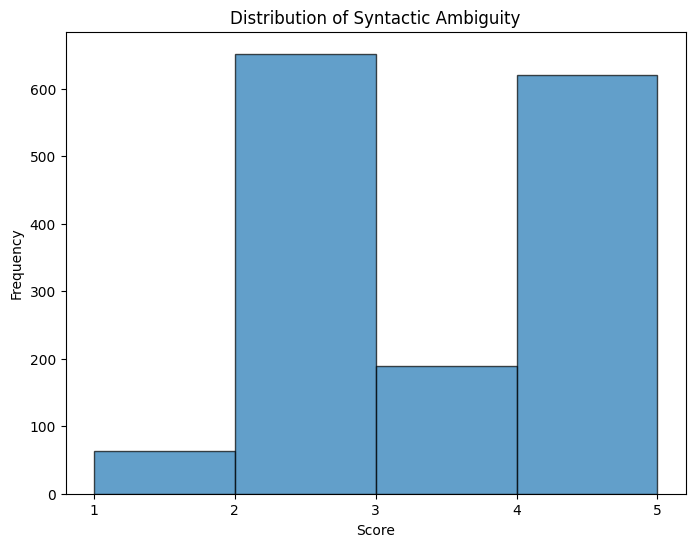

In [50]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist(df['difficulty'], bins=np.arange(1, 6), edgecolor='black', alpha=0.7)

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Syntactic Ambiguity")
plt.xticks(range(1, 6))

# Show the plot
plt.show()

In [51]:
df['difficulty'].describe()

count    1524.000000
mean        3.126640
std         1.294607
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: difficulty, dtype: float64

# Answerability
can judge model answer the generated question with context provided?

In [52]:
df['gpt_answer'].unique()

array(['a', 'd', 'c', 'b'], dtype=object)

In [53]:
df['correct_option'].unique()

array(['a', 'c', 'b', 'd', 'A',
       'A type of bacterial infection that occurs in hospitals',
       'A distinction must be made between personal misconduct or misconduct detached from the service, which gives rise to personal civil liability on the part of the perpetrator.',
       'A violation of professional ethics',
       'Lowering of the testicle via an inguinal approach',
       'A painful enlargement of the bursae is due to torsion',
       'to increase physical activity', 'B', '10/10th',
       'to prevent congenital heart malformations',
       'To remove contaminants from treated water',
       'to ensure quality control before publication',
       'to identify a specific problem or phenomenon',
       'to facilitate communication between healthcare providers and patients',
       'A single chancre with minimal inflammation',
       'A clinical examination of both members of the couple',
       ' option_a', 'To quit smoking', 'Myocarditis', 'C',
       'To monitor and pre

In [54]:
answerability_freqs = {
    'True': round((df['correct_option'] == df['gpt_answer']).sum() / len(df) * 100, 2), 
    'False': round((len(df) - (df['correct_option'] == df['gpt_answer']).sum()) / len(df) * 100, 2)
}

answerability_freqs

{'True': np.float64(46.92), 'False': np.float64(53.08)}